# **Análisis de Datos: Mundiales de la FIFA**

La idea de este notebook es analizar mundiales de la FIFA, los países con más goles, los mejores arqueros, etc.

In [ ]:
#importamos las librerias que de entrada sabemos que las vamos a usar

import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

fpartidos = '/content/drive/My Drive/LaboDatos2022/PrimeraEjercitacion/WorldCupMatches.csv'
fjugadores = '/content/drive/My Drive/LaboDatos2022/PrimeraEjercitacion/WorldCupPlayers.csv'

Mounted at /content/drive


In [ ]:
#montamos los dataframes para poder analizarlos

csv_partidos = pd.read_csv(fpartidos)
csv_jugadores = pd.read_csv(fjugadores)
                           
df_p = pd.DataFrame(csv_partidos)
df_j = pd.DataFrame(csv_jugadores)

In [ ]:
#print(df_p.columns)  #analizamos por arriba los df para ver con que estamos tratando
#print(df_j.columns)

df_p

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df_p
#examinando el df de los partidos vi q habia muchos NaN y valores repetidos en MatchID, asi q los droppeo
df_p.dropna(inplace=True)
df_p.drop_duplicates(subset=['MatchID'], inplace=True)
df_p['MatchID'].value_counts()

1096.0         1
43950048.0     1
8758.0         1
8759.0         1
8762.0         1
              ..
2197.0         1
2246.0         1
2224.0         1
2408.0         1
300186497.0    1
Name: MatchID, Length: 835, dtype: int64

In [ ]:
#aca creamos una nueva columna con la cantidad total de goles que fueron anotados en cada partido

df_p1 = df_p.copy()
df_p1['Total Goals in that Match'] = df_p['Home Team Goals'] + df_p['Away Team Goals'] + df_p['Half-time Away Goals'] + df_p['Half-time Home Goals']

In [ ]:
def avg_goals_year(df, year):                   #funcion que nos calcula la cantidad de goles promedio por año dado un df_p y un año
  df2 = df[df['Year'] == year]
  sum = df2['Total Goals in that Match'].sum()
  avg = sum/df2.size
  return avg

def total_goals_year(df, year):
  df2 = df[df['Year'] == year]
  total = df2['Total Goals in that Match'].sum()
  return total

#total_goals_year(df_p1, 2014)  #->aca calculamos que eran 200 goles para el año 2014 (ver mas adelante)

In [ ]:
l_years = [i for i in df_p1['Year'].unique()]   #armamos una lista con los años de mundiales para despues poder armar un dict
#l_years
avg_dict = dict()

for year in l_years:
  avg_dict[avg_goals_year(df_p1, year)] = year.astype(int)   #aca tenemos el dict con key=avg y vals=years, podemos "ordenarlo" y sacar el histograma

#creamos las columnas como Series
avg_year = pd.Series(avg_dict.keys())
year = pd.Series(avg_dict.values())

#creamos el nuevo df con las columnas que hicimos ahi arriba
df_p11 = pd.DataFrame()
df_p11['Year'] = year
df_p11['Avg'] = avg_year

df_p11 = df_p11.sort_values('Avg', ascending=False)  #aca lo ordenamos, ya listo para analizar
df_p11

,Year,Avg
4,1954,0.364469
2,1938,0.301587
3,1950,0.279221
1,1934,0.277311
0,1930,0.269841
5,1958,0.244898
7,1966,0.191964
6,1978,0.190476
8,1970,0.188988
13,1994,0.185897


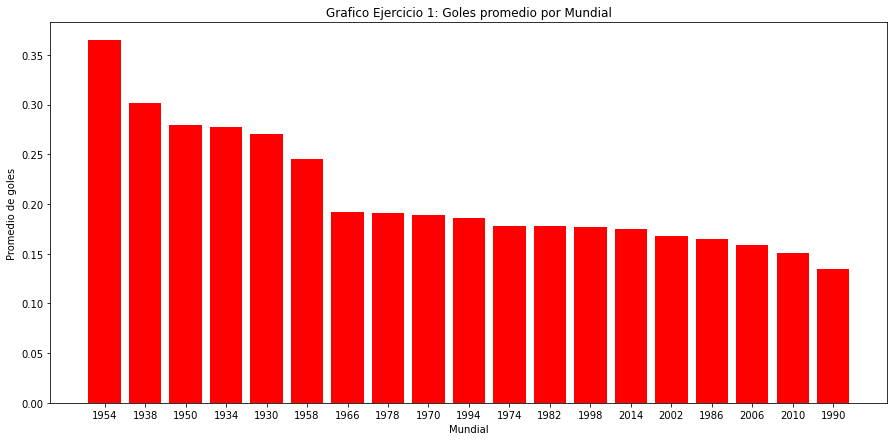

In [ ]:
import matplotlib.pyplot as plt

#creamos nuestras listas con datos, por alguna razon queda mejor que si usamos el df directo
x = [str(mundial) for mundial in df_p11['Year']]
y = [avg for avg in df_p11['Avg']]

plt.figure(figsize=(15,7))
plt.bar(x, height=y, width=0.8, color='r')


plt.xlabel("Mundial")
plt.ylabel("Promedio de goles")
plt.title("Grafico Ejercicio 1: Goles promedio por Mundial")
plt.show()  ##me faltaria nomas ordenarlo de izquiera a derecha,pero ni siquiera esta muy claro en la consigna. asi q me voy a dormir pr ahora

In [ ]:
# EJERCICIO 2
#primero chusmeamos que forma tienen los datos de la columna win conditions

df_p['Win conditions'].value_counts()

                                                 779
Italy win after extra time                         5
Argentina win after extra time                     3
Win on Golden Goal                                 3
England win after extra time                       3
France win after extra time                        2
France win on penalties (3 - 4)                    2
Brazil win on penalties (3 - 2)                    2
Belgium win after extra time                       2
Paraguay win on penalties (5 - 3)                  1
Uruguay win on penalties (4 - 2)                   1
Ghana win after extra time                         1
Spain win after extra time                         1
Germany win after extra time                       1
Italy win on penalties (5 - 3)                     1
Portugal win on penalties (1 - 3)                  1
Argentina win on penalties (2 - 4)                 1
Germany win on penalties (4 - 2)                   1
Ukraine win on penalties (0 - 3)              

In [ ]:
#vemos que hay valores de 'Win conditions' en los que hay ganadores por penales, pero no nos dice quien
#inspeccionemos el df_p en esas filas especificamente

df_p[df_p['Win conditions'].str.startswith(' win')]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
357,1982.0,08 Jul 1982 - 21:00,Semi-finals,Ramon Sanchez Pizjuan,Seville,Germany FR,3.0,3.0,France,win on penalties (5 - 4),70000.0,0.0,0.0,CORVER Charles (NED),GALLER Bruno (SUI),VALENTINE Robert (SCO),295.0,914.0,FRG,FRA
456,1990.0,30 Jun 1990 - 17:00,Quarter-finals,Comunale,Florence,Yugoslavia,0.0,0.0,Argentina,win on penalties (2 - 3),38971.0,0.0,0.0,ROETHLISBERGER Kurt (SUI),JOUINI Neji (TUN),HANSAL Mohamed (ALG),751.0,31.0,YUG,ARG
460,1990.0,03 Jul 1990 - 20:00,Semi-finals,San Paolo,Naples,Italy,1.0,1.0,Argentina,win on penalties (3 - 4),59978.0,0.0,0.0,VAUTROT Michel (FRA),LISTKIEWICZ Michal (POL),MIKKELSEN Peter (DEN),3464.0,28.0,ITA,ARG
461,1990.0,04 Jul 1990 - 20:00,Semi-finals,Stadio delle Alpi,Turin,Germany FR,1.0,1.0,England,win on penalties (4 - 3),62628.0,0.0,0.0,RAMIZ WRIGHT Jose (BRA),QUINIOU Joel (FRA),PEREZ HOYOS Armando (COL),3464.0,159.0,FRG,ENG


In [ ]:
#podriamos definir una funcion general, pero como son solo 4 filas para corregir, elijo la simplicidad de no pensar la funcion general que haría esto:
# vemos que en cada partido el 'win on penalties (X-Y)' el X es la cantidad de goles del home team, y el Y es el away team
#asi sabemos facilmente quein corresponde que gane en cada caso

df_p2 = df_p.copy()


df_p2['Win conditions'].loc[357] = 'Germany FR win on penalties (5 - 4)'
df_p2['Win conditions'].loc[456] = 'Argentina win on penalties (2 - 3)'
df_p2['Win conditions'].loc[460] = 'Argentina win on penalties (3 - 4)'
df_p2['Win conditions'].loc[461] = 'Germany FR win on penalties (4 - 3)'

df_p2[df_p['Win conditions'].str.startswith(' win')] #verificamos si funcionó

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
357,1982.0,08 Jul 1982 - 21:00,Semi-finals,Ramon Sanchez Pizjuan,Seville,Germany FR,3.0,3.0,France,Germany FR win on penalties (5 - 4),70000.0,0.0,0.0,CORVER Charles (NED),GALLER Bruno (SUI),VALENTINE Robert (SCO),295.0,914.0,FRG,FRA
456,1990.0,30 Jun 1990 - 17:00,Quarter-finals,Comunale,Florence,Yugoslavia,0.0,0.0,Argentina,Argentina win on penalties (2 - 3),38971.0,0.0,0.0,ROETHLISBERGER Kurt (SUI),JOUINI Neji (TUN),HANSAL Mohamed (ALG),751.0,31.0,YUG,ARG
460,1990.0,03 Jul 1990 - 20:00,Semi-finals,San Paolo,Naples,Italy,1.0,1.0,Argentina,Argentina win on penalties (3 - 4),59978.0,0.0,0.0,VAUTROT Michel (FRA),LISTKIEWICZ Michal (POL),MIKKELSEN Peter (DEN),3464.0,28.0,ITA,ARG
461,1990.0,04 Jul 1990 - 20:00,Semi-finals,Stadio delle Alpi,Turin,Germany FR,1.0,1.0,England,Germany FR win on penalties (4 - 3),62628.0,0.0,0.0,RAMIZ WRIGHT Jose (BRA),QUINIOU Joel (FRA),PEREZ HOYOS Armando (COL),3464.0,159.0,FRG,ENG


In [ ]:
#nos creamos una lista con todos los paises que ganaron partidos por penales

l_penales = list()

for condition in df_p2['Win conditions']:    
  if 'penalties' in condition:
    l_penales.append(condition)
#l_penales

for i in range(len(l_penales)):
  l_penales[i] = (l_penales[i].split('win', 1)[0]).rstrip()    #aca modificamos la lista de partidos ganados por penales, solo nos interesa el pais ganador

l_penales

['Germany FR',
 'France',
 'Germany FR',
 'Belgium',
 'Republic of Ireland',
 'Argentina',
 'Argentina',
 'Germany FR',
 'Bulgaria',
 'Sweden',
 'Brazil',
 'Argentina',
 'France',
 'Brazil',
 'Spain',
 'Korea Republic',
 'Ukraine',
 'Germany',
 'Portugal',
 'Italy',
 'Paraguay',
 'Uruguay',
 'Brazil',
 'Argentina',
 'Netherlands',
 'Costa Rica']

In [ ]:
#ahora nos creamos un diccionario que haga un conteo de la cantidad de veces que un pais haya ganado por penales:
#estamos asumiendo que Germany FR y Germany son dos paises distintos, pues son dos estados, sociedades, y sistemas politicos distintos

count_penales = dict()   #diccionario vacio

for country in l_penales:
  try:
    count_penales[country] += 1    #si la key ya esta en el dict, le sumamos 1 al value
  except:
    count_penales[country] = 1     #si la key no estaba en el dict, la creamos con value 1

count_penales

{'Argentina': 4,
 'Belgium': 1,
 'Brazil': 3,
 'Bulgaria': 1,
 'Costa Rica': 1,
 'France': 2,
 'Germany': 1,
 'Germany FR': 3,
 'Italy': 1,
 'Korea Republic': 1,
 'Netherlands': 1,
 'Paraguay': 1,
 'Portugal': 1,
 'Republic of Ireland': 1,
 'Spain': 1,
 'Sweden': 1,
 'Ukraine': 1,
 'Uruguay': 1}

In [ ]:
#creamos un dtaframe para poder ordenar los valores, sino no puedo ordenar el dict para que quede lindo el grafico

df_p21 = pd.DataFrame()

df_p21['Country'] = pd.Series([i for i in count_penales.keys()])
df_p21['Matches won by penalties'] = pd.Series([i for i in count_penales.values()])

df_p21.sort_values(by='Matches won by penalties', ascending=False, inplace=True)
df_p21

,Country,Matches won by penalties
4,Argentina,4
0,Germany FR,3
7,Brazil,3
1,France,2
11,Germany,1
16,Netherlands,1
15,Uruguay,1
14,Paraguay,1
13,Italy,1
12,Portugal,1


<function matplotlib.pyplot.show>

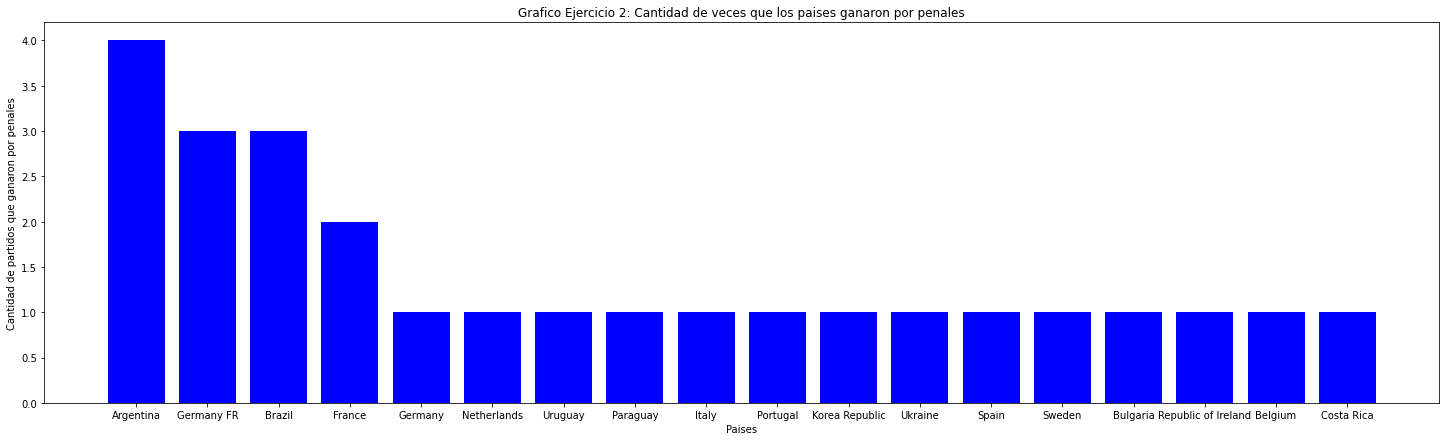

In [ ]:
#ahora que ya tenemos la info que queremos, hagamos el grafico:

x = [str(i) for i in df_p21['Country']]
y = [i for i in df_p21['Matches won by penalties']]

plt.figure(figsize=(25,7))
plt.bar(x, height=y, width=0.8, color='b')

plt.xlabel("Paises")
plt.ylabel("Cantidad de partidos que ganaron por penales")
plt.title("Grafico Ejercicio 2: Cantidad de veces que los paises ganaron por penales")

plt.show

In [ ]:
#ahora viene la parte mas dificil del ejercicio, averiguar quien es el arquero que más penales atajó.
#vamos a tener que mergear ambos df, asi que chusmeemos quienes son las columnas a ver donde hacer el join

print(df_p2.columns)
print(df_j.columns)

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')
Index(['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up',
       'Shirt Number', 'Player Name', 'Position', 'Event'],
      dtype='object')


In [ ]:
df_j.drop_duplicates(inplace=True)
df_j2 = df_j.copy()

In [ ]:
#hacemos el join de ambos df en uno unico en base al match id
df_2 = df_p2.merge(df_j2, how='inner', on='MatchID')

df_2.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID_x', 'MatchID', 'Home Team Initials', 'Away Team Initials',
       'RoundID_y', 'Team Initials', 'Coach Name', 'Line-up', 'Shirt Number',
       'Player Name', 'Position', 'Event'],
      dtype='object')

In [ ]:
#pero solo me interesan las siguientes columnas
cols_ej2 = ['Home Team Initials', 'Away Team Initials', 'Home Team Name', 'Away Team Name','Win conditions', 'Player Name', 'Position', 'Team Initials']

df_21 = df_2[cols_ej2] #filtramos el df para obtener solo las columnas que nos interesan
df_21 = df_21[df_21['Win conditions'].str.contains("penalties")] #filtramos las filas, solo queremos las de los penales
df_21 = df_21[df_21['Position'] == "GK"] #filtramos las filas, solo queremos los jugadores que son GK

#hay algo importante que remarcar, por partido tenemos dos filas: la del equipo ganador y la del equpo perdedor, tendriamos que ver de conseguir solo las de los ganadores
df_21

,Home Team Initials,Away Team Initials,Home Team Name,Away Team Name,Win conditions,Player Name,Position,Team Initials
15457,FRG,FRA,Germany FR,France,Germany FR win on penalties (5 - 4),Harald SCHUMACHER,GK,FRG
15458,FRG,FRA,Germany FR,France,Germany FR win on penalties (5 - 4),Jean Luc ETTORI,GK,FRA
17525,BRA,FRA,Brazil,France,France win on penalties (3 - 4),CARLOS,GK,BRA
17526,BRA,FRA,Brazil,France,France win on penalties (3 - 4),Joel BATS,GK,FRA
17569,FRG,MEX,Germany FR,Mexico,Germany FR win on penalties (4 - 1),Harald SCHUMACHER,GK,FRG
...,...,...,...,...,...,...,...,...
36865,CRC,GRE,Costa Rica,Greece,Costa Rica win on penalties (5 - 3),KARNEZIS,GK,GRE
36886,CRC,GRE,Costa Rica,Greece,Costa Rica win on penalties (5 - 3),PEMBERTON P.,GK,CRC
36887,CRC,GRE,Costa Rica,Greece,Costa Rica win on penalties (5 - 3),GLYKOS,GK,GRE
36888,CRC,GRE,Costa Rica,Greece,Costa Rica win on penalties (5 - 3),CAMBRONERO D.,GK,CRC


In [ ]:
def agrego_winnercountry(df):  #defino una fn que me crea una columna en cada partido anunciando quien fue el pais ganador
  df['Winner Country'] = pd.Series()
  for i in df.index:
    wc = df['Win conditions'].loc[i]
    hn = df['Home Team Name'].loc[i]
    an = df['Away Team Name'].loc[i]
    
    if hn in wc:
      df['Winner Country'].loc[i] = hn
    elif an in wc:
      df['Winner Country'].loc[i] = an
  
  return None

def agrego_winnerinitials(df): #hace lo mismo pero con las iniciales del pais ganador
    df['Winner Initials'] = pd.Series()
    for i in df.index:
      hi = df['Home Team Initials'].loc[i]
      ai = df['Away Team Initials'].loc[i]

      if df['Winner Country'].loc[i] == df['Home Team Name'].loc[i]:
        df['Winner Initials'].loc[i] = hi
      else:
        df['Winner Initials'].loc[i] = ai

    return None #void

In [ ]:
agrego_winnercountry(df_21)
agrego_winnerinitials(df_21)
df_21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  app.launch_new_instance()


,Home Team Initials,Away Team Initials,Home Team Name,Away Team Name,Win conditions,Player Name,Position,Team Initials,Winner Country,Winner Initials
15457,FRG,FRA,Germany FR,France,Germany FR win on penalties (5 - 4),Harald SCHUMACHER,GK,FRG,Germany FR,FRG
15458,FRG,FRA,Germany FR,France,Germany FR win on penalties (5 - 4),Jean Luc ETTORI,GK,FRA,Germany FR,FRG
17525,BRA,FRA,Brazil,France,France win on penalties (3 - 4),CARLOS,GK,BRA,France,FRA
17526,BRA,FRA,Brazil,France,France win on penalties (3 - 4),Joel BATS,GK,FRA,France,FRA
17569,FRG,MEX,Germany FR,Mexico,Germany FR win on penalties (4 - 1),Harald SCHUMACHER,GK,FRG,Germany FR,FRG
...,...,...,...,...,...,...,...,...,...,...
36865,CRC,GRE,Costa Rica,Greece,Costa Rica win on penalties (5 - 3),KARNEZIS,GK,GRE,Costa Rica,CRC
36886,CRC,GRE,Costa Rica,Greece,Costa Rica win on penalties (5 - 3),PEMBERTON P.,GK,CRC,Costa Rica,CRC
36887,CRC,GRE,Costa Rica,Greece,Costa Rica win on penalties (5 - 3),GLYKOS,GK,GRE,Costa Rica,CRC
36888,CRC,GRE,Costa Rica,Greece,Costa Rica win on penalties (5 - 3),CAMBRONERO D.,GK,CRC,Costa Rica,CRC


In [ ]:
# ahora tenemos un df con toda la info que necesitamos (de hecho tiene ifno de sobra :V)

df_21 = df_21[df_21['Team Initials'] == df_21['Winner Initials']] #nos quedamos solo con las filas que tienen al equipo ganador

df_21 #este si que es el dataframe que queriamos, tiene todos los nombres de arqueros que ganaron los partidos por penales

,Home Team Initials,Away Team Initials,Home Team Name,Away Team Name,Win conditions,Player Name,Position,Team Initials,Winner Country,Winner Initials
15457,FRG,FRA,Germany FR,France,Germany FR win on penalties (5 - 4),Harald SCHUMACHER,GK,FRG,Germany FR,FRG
17526,BRA,FRA,Brazil,France,France win on penalties (3 - 4),Joel BATS,GK,FRA,France,FRA
17569,FRG,MEX,Germany FR,Mexico,Germany FR win on penalties (4 - 1),Harald SCHUMACHER,GK,FRG,Germany FR,FRG
17614,ESP,BEL,Spain,Belgium,Belgium win on penalties (4 - 5),Jean Marie PFAFF,GK,BEL,Belgium,BEL
19816,YUG,ARG,Yugoslavia,Argentina,Argentina win on penalties (2 - 3),Sergio GOYCOCHEA,GK,ARG,Argentina,ARG
19993,ITA,ARG,Italy,Argentina,Argentina win on penalties (3 - 4),Sergio GOYCOCHEA,GK,ARG,Argentina,ARG
20015,ITA,ARG,Italy,Argentina,Argentina win on penalties (3 - 4),Angel COMIZZO,GK,ARG,Argentina,ARG
20017,ITA,ARG,Italy,Argentina,Argentina win on penalties (3 - 4),Nery PUMPIDO,GK,ARG,Argentina,ARG
20019,ITA,ARG,Italy,Argentina,Argentina win on penalties (3 - 4),Fabian CANCELARICH,GK,ARG,Argentina,ARG
20037,FRG,ENG,Germany FR,England,Germany FR win on penalties (4 - 3),Bodo ILLGNER,GK,FRG,Germany FR,FRG


In [ ]:
# y ahora pedimos el maximo.
#de todos modos, si uno inspecciona df_21 vemos que son varios los arqueros que ganaron 2 partidos por penales :(

#df_21['Player Name'].value_counts()


arquero = df_21['Player Name'].iloc[df_21['Player Name'].value_counts().max()]   #pedimos el max
print('El arquero que mas partidos ganó por penales es', arquero) #printeamos la respuesta

El arquero que mas partidos ganó por penales es Harald SCHUMACHER


In [ ]:
#EJERCICIO 3
#aca nos piden hacer un histograma de la distribucion de goles por periodo de tiempo (90' entre bins de 4')
#hay que hacer 2 graficos, uno para la fase de grupos y uno para la fase de eliminacion
#de entrada vemos que vamos a necesitar mergear ambos df

In [ ]:
df_p3 = df_p.copy()
df_j3 = df_j.copy()

#df_p3['MatchID'].value_counts()
#df_j3.value_counts()

#hacemos el merge en la columna match id
df_3 = df_p3.merge(df_j3, how='inner', on='MatchID')[
        ['Year', 'Stage', 'Home Team Goals', 'Away Team Goals', 'MatchID', 'Player Name', 'Position', 'Event']] #filtramos xq solo queremos estas columnas


df_3

,Year,Stage,Home Team Goals,Away Team Goals,MatchID,Player Name,Position,Event
0,1930.0,Group 1,4.0,1.0,1096.0,Alex THEPOT,GK,NaN
1,1930.0,Group 1,4.0,1.0,1096.0,Oscar BONFIGLIO,GK,NaN
2,1930.0,Group 1,4.0,1.0,1096.0,Marcel LANGILLER,NaN,G40'
3,1930.0,Group 1,4.0,1.0,1096.0,Juan CARRENO,NaN,G70'
4,1930.0,Group 1,4.0,1.0,1096.0,Ernest LIBERATI,NaN,NaN
...,...,...,...,...,...,...,...,...
36997,2014.0,Round of 16,2.0,1.0,300186497.0,ALTIDORE,NaN,NaN
36998,2014.0,Round of 16,2.0,1.0,300186497.0,DEFOUR,NaN,NaN
36999,2014.0,Round of 16,2.0,1.0,300186497.0,WONDOLOWSKI,NaN,I72'
37000,2014.0,Round of 16,2.0,1.0,300186497.0,VANDEN BORRE,NaN,NaN


In [ ]:
#me quedo con las filas que contienen eventos que no sean NaN
#me quedo con las filas cuyos eventos son solamente goles

df_31 = df_3[df_3['Event'].str.contains('G') & df_3['Event'].notna()] 
#df_31.drop_duplicates(subset=['MatchID'], inplace=True) #nos habian quedado muchos duplicados por todos los jugadores

df_31

,Year,Stage,Home Team Goals,Away Team Goals,MatchID,Player Name,Position,Event
2,1930.0,Group 1,4.0,1.0,1096.0,Marcel LANGILLER,NaN,G40'
3,1930.0,Group 1,4.0,1.0,1096.0,Juan CARRENO,NaN,G70'
6,1930.0,Group 1,4.0,1.0,1096.0,Andre MASCHINOT,NaN,G43' G87'
14,1930.0,Group 1,4.0,1.0,1096.0,Lucien LAURENT,NaN,G19'
35,1930.0,Group 4,3.0,0.0,1090.0,Tom FLORIE,C,G45'
...,...,...,...,...,...,...,...,...
36881,2014.0,Round of 16,1.0,1.0,300186459.0,SOKRATIS,NaN,G90'
36918,2014.0,Round of 16,1.0,0.0,300186503.0,DI MARIA,NaN,G118' Y120'
36966,2014.0,Round of 16,2.0,1.0,300186497.0,DE BRUYNE,NaN,G93'
36984,2014.0,Round of 16,2.0,1.0,300186497.0,LUKAKU,NaN,I91' G105'


In [ ]:
#aca vamos a intentar modificar el df para que solo nos aparezca el minuto de cada gol
import re

df_31['Goals in minutes'] = pd.Series(dtype=object) #creamos una columna vacia que toma objetos (le vamos a pasar listas)
for i in df_31.index:
  evento = df_31['Event'].loc[i]
  s = [s for s in re.findall(r'(?<=G)-?\d+?\d*', evento)]   #aca usamos regex para extraer los eventos de la forma 'GX' con X = minuto del gol
  df_31['Goals in minutes'].loc[i] = [] + s


df_31

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Year,Stage,Home Team Goals,Away Team Goals,MatchID,Player Name,Position,Event,Goals in minutes
2,1930.0,Group 1,4.0,1.0,1096.0,Marcel LANGILLER,NaN,G40',[40]
3,1930.0,Group 1,4.0,1.0,1096.0,Juan CARRENO,NaN,G70',[70]
6,1930.0,Group 1,4.0,1.0,1096.0,Andre MASCHINOT,NaN,G43' G87',"[43, 87]"
14,1930.0,Group 1,4.0,1.0,1096.0,Lucien LAURENT,NaN,G19',[19]
35,1930.0,Group 4,3.0,0.0,1090.0,Tom FLORIE,C,G45',[45]
...,...,...,...,...,...,...,...,...,...
36881,2014.0,Round of 16,1.0,1.0,300186459.0,SOKRATIS,NaN,G90',[90]
36918,2014.0,Round of 16,1.0,0.0,300186503.0,DI MARIA,NaN,G118' Y120',[118]
36966,2014.0,Round of 16,2.0,1.0,300186497.0,DE BRUYNE,NaN,G93',[93]
36984,2014.0,Round of 16,2.0,1.0,300186497.0,LUKAKU,NaN,I91' G105',[105]


In [ ]:
df_31['Stage'].value_counts()

Group 2                     147
Quarter-finals              136
Group 1                     133
Group 4                     128
Group B                     128
Group A                     124
Round of 16                 121
Group 3                     117
Group C                     103
Group D                      98
Group E                      98
Semi-finals                  90
Group F                      77
Group G                      62
Group H                      62
Final                        54
Match for third place        48
Group 6                      46
Preliminary round            31
First round                  31
Group 5                       6
Third place                   6
Play-off for third place      2
Name: Stage, dtype: int64

In [ ]:
#nos creamos dos df nuevos filtrando por fase de grupos y fase de eliminatorias
df_32g = df_31.loc[df_31['Stage'].str.contains('Group')]  #fase de grupos
df_32e = df_31.loc[~df_31['Stage'].str.contains('Group')]  #fase de no grupos (elim)

#df_32e['Stage'].value_counts()
#df_32g['Stage'].value_counts()

In [ ]:
#me armo lista con todos los minutos en los que se metieron goles, una para fase de grupo y una para not grupos
#despues con esa lista vamos a calcular las frecuencias para el histograma

#la _g es de grupos, la _e es de eliminatorias
l_goles_e = list()
for i in df_32e.index:
  goles_x_minuto = df_32e['Goals in minutes'].loc[i]
  for j in range(len(goles_x_minuto)):
    l_goles_e.append(int(goles_x_minuto[j]))

l_goles_g = list()
for i in df_32g.index:
  goles_x_minuto = df_32g['Goals in minutes'].loc[i]
  for j in range(len(goles_x_minuto)):
    l_goles_g.append(int(goles_x_minuto[j]))


#me hago un dict con key=minuto del gol, val=frecuencia en que ese gol aparece en la lista
#igual que antes, hacemos uno para fase de grupos y otra para not grupos
d_goles_e = dict()
for i in l_goles_e:
  try:
    d_goles_e[i] += 1
  except:
    d_goles_e[i] = 1


d_goles_g =dict()
for i in l_goles_g:
  try:
    d_goles_g[i] += 1
  except:
    d_goles_g[i] = 1

#d_goles_g
#d_goles_e

In [ ]:
#esto es medio confuso pero tiene una explicacion.
#primero notamos que x el algoritmo de division entera (Algebra I):  90 = 4*22 + 2. i.e: al dividir 90 entre 4, nos sobran 2
#basicamente en este lagoritmo lo que hacemos es un ciclo que va iterando mod 4 asi que vamos obteniendo la suma de los goles en franjas de 4 minutos
#**

d_frec_goles_g, d_frec_goles_e = dict(), dict()
i = 1
while i < 86: #necesitamos 90 minutos, y restamos 4 porque el algoritmo itera en mod 4
  d_frec_goles_g[i] = d_goles_g[i] + d_goles_g[i + 1] + d_goles_g[i + 2] + d_goles_g[i + 3]
  d_frec_goles_e[i] = d_goles_e[i] + d_goles_e[i + 1] + d_goles_e[i + 2] + d_goles_e[i + 3]
  
  if i == 85:                                                                    #esta linea la agregamos justamente porque el ultimo bin debe tener 6 minutos para que sean 90 total
    d_frec_goles_g[i] = d_frec_goles_g[i] + d_goles_g[89] + d_goles_g[90]         #sino solo estariamos contando hasta el minuto 88
    d_frec_goles_e[i] = d_frec_goles_e[i] + d_goles_e[89] + d_goles_e[90]
  i+=4

#d_frec_goles_e
#d_frec_goles_g

In [ ]:
#nos creamos dos df, uno con grupos y uno con elim, que muestra el minuto y la cantidad de goles por minuto (frecuencia)
#basicamente cada df es una tabla de frecuencias de goles por minuto

minuto_e = pd.Series(d_frec_goles_e.keys())
frecuencia_e = pd.Series(d_frec_goles_e.values())

minuto_g = pd.Series(d_frec_goles_g.keys())
frecuencia_g = pd.Series(d_frec_goles_g.values())

df_33e, df_33g = pd.DataFrame(), pd.DataFrame()

df_33e['Minuto'] = minuto_e
df_33e['Frecuencia'] = frecuencia_e

df_33g['Minuto'] = minuto_g
df_33g['Frecuencia'] = frecuencia_g

df_33e.sort_values('Minuto', inplace=True)
df_33g.sort_values('Minuto', inplace=True)

#df_33e
#df_33g

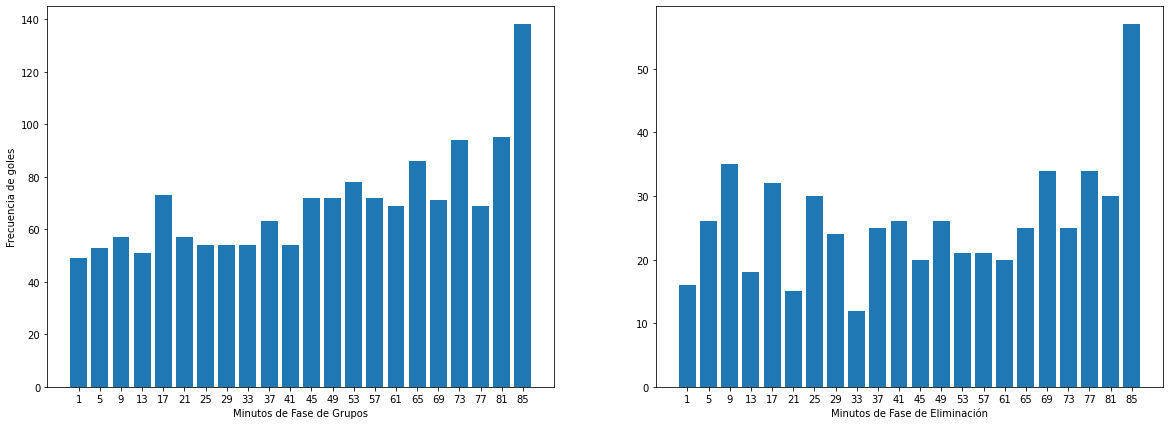

In [ ]:
#y ahora ya tenemo todo para graficar

titulo = 'Graficos Ejercicio 3: Frecuencia de goles por minuto de juego'

fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (20, 7))

x_grupos = [str(i) for i in df_33g['Minuto']]
x_elim = [str(j) for j in df_33e['Minuto']]

ax[0].bar(x=x_grupos, height=df_33g['Frecuencia'])
ax[0].set_ylabel('Frecuencia de goles')
ax[0].set_xlabel('Minutos de Fase de Grupos')

ax[1].bar(x=x_elim, height=df_33e['Frecuencia'])
ax[1].set_xlabel('Minutos de Fase de Eliminación')

plt.show()

In [ ]:
#EJERCICIO 4:

#empezamos haciendo el df_4 con los goles por partido de todos los partidos
#ya lo tenemos codeado del ejercicio anterior :D

df_4 = df_31.copy()
df_4

,Year,Stage,Home Team Goals,Away Team Goals,MatchID,Player Name,Position,Event,Goals in minutes
2,1930.0,Group 1,4.0,1.0,1096.0,Marcel LANGILLER,NaN,G40',[40]
3,1930.0,Group 1,4.0,1.0,1096.0,Juan CARRENO,NaN,G70',[70]
6,1930.0,Group 1,4.0,1.0,1096.0,Andre MASCHINOT,NaN,G43' G87',"[43, 87]"
14,1930.0,Group 1,4.0,1.0,1096.0,Lucien LAURENT,NaN,G19',[19]
35,1930.0,Group 4,3.0,0.0,1090.0,Tom FLORIE,C,G45',[45]
...,...,...,...,...,...,...,...,...,...
36881,2014.0,Round of 16,1.0,1.0,300186459.0,SOKRATIS,NaN,G90',[90]
36918,2014.0,Round of 16,1.0,0.0,300186503.0,DI MARIA,NaN,G118' Y120',[118]
36966,2014.0,Round of 16,2.0,1.0,300186497.0,DE BRUYNE,NaN,G93',[93]
36984,2014.0,Round of 16,2.0,1.0,300186497.0,LUKAKU,NaN,I91' G105',[105]


In [ ]:
#armo una funcion que me tire los indices de las filas (partidos) donde no hubo goles
def no_hubo_goles(df):
  indices = list()
  for i in range(len(df['Goals in minutes'])):
    if len(df['Goals in minutes'].iloc[i]) == 0:
      indices.append(i)
  
  return indices

In [ ]:
#usamos esa funcioncita para verificar si hubo partidos sin goles
indices_sin_goles = no_hubo_goles(df_4)
indices_sin_goles

#vemos que en todos los partidos que estan en nuestro df hubo algun gol :D
#tambien lo podemos chequear haciendo un value_counts() o sortenado el df segun la columna de las listas de goles y vinedo que no hay listas vacias
#esto es por cómo armamos el df al principio del ejercicio 3 :D

[]

In [ ]:
df_4['Primer Gol'] = [min(df_4['Goals in minutes'].iloc[i]) for i in range(len(df_4))] # agregamos una coolumna con el minuto del primer gol

In [ ]:
#nos armamos la lista con los datos para el primer grafico:
x1 = [int(i) for i in df_4['Primer Gol']] #al parecer la columna es de strings
x1

[40,
 70,
 43,
 19,
 45,
 23,
 69,
 30,
 62,
 21,
 1,
 89,
 79,
 75,
 81,
 3,
 65,
 85,
 60,
 10,
 60,
 65,
 53,
 75,
 12,
 17,
 65,
 67,
 37,
 40,
 30,
 35,
 7,
 24,
 15,
 51,
 12,
 56,
 69,
 20,
 80,
 89,
 20,
 18,
 61,
 4,
 89,
 57,
 12,
 68,
 37,
 20,
 93,
 44,
 18,
 109,
 35,
 11,
 31,
 53,
 29,
 43,
 69,
 66,
 48,
 67,
 4,
 79,
 49,
 29,
 66,
 25,
 25,
 55,
 29,
 63,
 90,
 18,
 20,
 57,
 50,
 67,
 11,
 82,
 78,
 49,
 18,
 24,
 60,
 82,
 44,
 30,
 8,
 51,
 11,
 19,
 62,
 21,
 1,
 54,
 27,
 28,
 95,
 71,
 81,
 29,
 43,
 13,
 15,
 28,
 35,
 16,
 38,
 1,
 105,
 103,
 35,
 69,
 88,
 94,
 2,
 83,
 44,
 118,
 25,
 104,
 111,
 93,
 118,
 35,
 51,
 57,
 75,
 8,
 64,
 42,
 30,
 40,
 89,
 81,
 80,
 22,
 84,
 51,
 10,
 9,
 63,
 25,
 57,
 65,
 37,
 39,
 1,
 51,
 87,
 80,
 63,
 38,
 44,
 28,
 16,
 70,
 8,
 35,
 30,
 71,
 65,
 51,
 39,
 81,
 89,
 17,
 83,
 78,
 34,
 7,
 25,
 84,
 70,
 59,
 17,
 32,
 3,
 20,
 23,
 81,
 17,
 30,
 74,
 35,
 26,
 17,
 38,
 4,
 69,
 48,
 63,
 12,
 23,
 18,
 14,
 83,

In [ ]:
#ahora agregamos la columna con las diferencias inter goles,
#para esto vamos a necesitar una funcion que lo haga
#y una nueva columna de listas

df_4['DT Goles'] = pd.Series(dtype=object) #le ponemos DT porque no tengo el simbolo delta

In [ ]:
#Definimos la funcion que va a llenar la columna DT goles con las diferencias entre los tiempos de goles

def calculo_diferencias(df):
  for i in range(len(df)):  #iteramos i sobre la longitud de filas del df
    l_dt = list()
    l_gol = df['Goals in minutes'].iloc[i]
    
    for j in range(len(l_gol)-1):  #si tenemos un solo gol no entra en este ciclo, por lo que le termina asignando una lista vacia
      dif = int(l_gol[j+1])-int(l_gol[j])
      l_dt.append(dif)
    
    df['DT Goles'].iloc[i] = l_dt   #aca asignamos en cada fila lo que corresponda

  return None #void

In [ ]:
calculo_diferencias(df_4)

df_4

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Year,Stage,Home Team Goals,Away Team Goals,MatchID,Player Name,Position,Event,Goals in minutes,Primer Gol,DT Goles
2,1930.0,Group 1,4.0,1.0,1096.0,Marcel LANGILLER,NaN,G40',[40],40,[]
3,1930.0,Group 1,4.0,1.0,1096.0,Juan CARRENO,NaN,G70',[70],70,[]
6,1930.0,Group 1,4.0,1.0,1096.0,Andre MASCHINOT,NaN,G43' G87',"[43, 87]",43,[44]
14,1930.0,Group 1,4.0,1.0,1096.0,Lucien LAURENT,NaN,G19',[19],19,[]
35,1930.0,Group 4,3.0,0.0,1090.0,Tom FLORIE,C,G45',[45],45,[]
...,...,...,...,...,...,...,...,...,...,...,...
36881,2014.0,Round of 16,1.0,1.0,300186459.0,SOKRATIS,NaN,G90',[90],90,[]
36918,2014.0,Round of 16,1.0,0.0,300186503.0,DI MARIA,NaN,G118' Y120',[118],118,[]
36966,2014.0,Round of 16,2.0,1.0,300186497.0,DE BRUYNE,NaN,G93',[93],93,[]
36984,2014.0,Round of 16,2.0,1.0,300186497.0,LUKAKU,NaN,I91' G105',[105],105,[]


In [ ]:
x2 = list()

for i in range(len(df_4)):               #aca nos creamos el espacio donde vamos a calcular las frecuencias para el histograma 2
  lista_difs = df_4['DT Goles'].iloc[i]
  for j in range(len(lista_difs)):
    x2.append(lista_difs[j])

x2

[44,
 62,
 7,
 5,
 35,
 43,
 9,
 63,
 16,
 36,
 1,
 18,
 5,
 11,
 49,
 5,
 4,
 30,
 36,
 58,
 14,
 4,
 17,
 11,
 35,
 49,
 3,
 48,
 11,
 41,
 61,
 41,
 53,
 59,
 27,
 6,
 30,
 29,
 75,
 11,
 3,
 72,
 8,
 15,
 7,
 21,
 46,
 11,
 66,
 29,
 49,
 44,
 71,
 28,
 31,
 26,
 11,
 28,
 2,
 49,
 19,
 16,
 6,
 24,
 8,
 9,
 12,
 14,
 77,
 8,
 37,
 55,
 66,
 31,
 53,
 30,
 10,
 17,
 3,
 62,
 18,
 48,
 9,
 2,
 20,
 27,
 6,
 30,
 17,
 67,
 71,
 2,
 26,
 23,
 8,
 2,
 41,
 81,
 28,
 11,
 7,
 66,
 47,
 47,
 6,
 37,
 51,
 81,
 25,
 21,
 74,
 41,
 27,
 23,
 7,
 55,
 8,
 12,
 11,
 20,
 42,
 11,
 35,
 23,
 11,
 3,
 5,
 47,
 62,
 14,
 62,
 41,
 2,
 28,
 23,
 31,
 13,
 57,
 65,
 14,
 58,
 37,
 57,
 72,
 29,
 50,
 83,
 19,
 22,
 42,
 10,
 49,
 61,
 1,
 7,
 13,
 48,
 23,
 13,
 37,
 16,
 79,
 55,
 22,
 51,
 70,
 4,
 16,
 53,
 31,
 80,
 6,
 45,
 35,
 41,
 17,
 13,
 55,
 21,
 6,
 27,
 22,
 67,
 31,
 79,
 3,
 4,
 3,
 66,
 29,
 48,
 9,
 3,
 24,
 22,
 27,
 48,
 47,
 22,
 20,
 49,
 51,
 40,
 56,
 13,
 56,
 26,
 8,
 5,

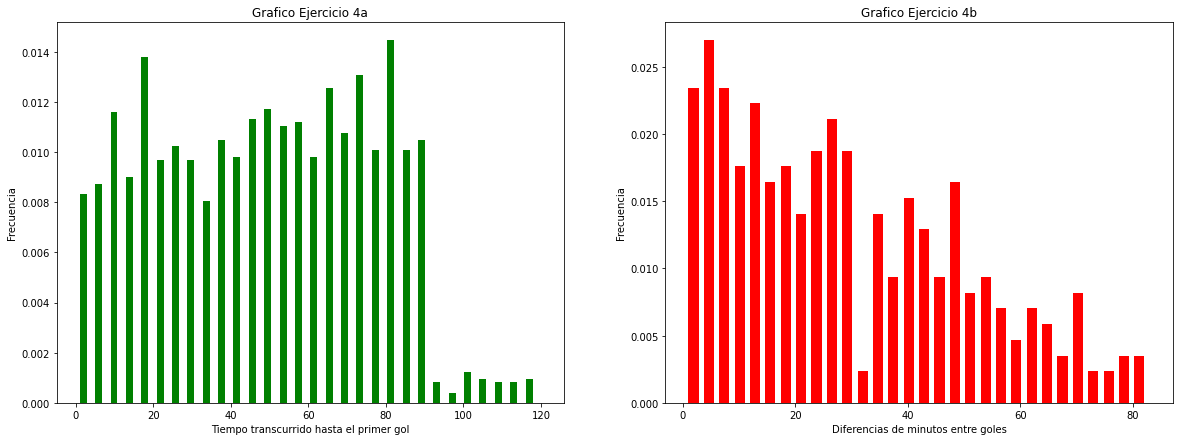

In [ ]:
#x1
#x2
#y ya tenemos todo para graficar :D

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

ax[0].hist(x1, bins=30, width = 1.8, color='g', density=True)
ax[0].set_xlabel('Tiempo transcurrido hasta el primer gol')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title('Grafico Ejercicio 4a')


ax[1].hist(x2, bins=30, width=1.8, color='r', density=True)
ax[1].set_xlabel('Diferencias de minutos entre goles')
ax[1].set_ylabel('Frecuencia')
ax[1].set_title('Grafico Ejercicio 4b')

plt.show()